<a href="https://colab.research.google.com/github/jamarju/demo_orla/blob/master/01_descarga_y_extrae_celebA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Mar 15 19:39:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from pathlib import Path
from PIL import Image
from tqdm.notebook import tqdm
import numpy as np
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!7z x /content/drive/MyDrive/demo_orla/CelebA/Img/img_celeba.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/demo_orla/CelebA/Img/                                                        0M 1 Scan /content/drive/MyDrive/demo_orla/CelebA/Img/img_celeba.7z/                                                                      1 folder, 14 files, 10191072466 bytes (9719 MiB)
  0%    
Extracting archive: /content/drive/MyDrive/demo_orla/CelebA/Img/img_celeba.7z/img_celeba.7z.001
--
Path = /content/drive/MyDrive/demo_orla/CelebA/Img/img_celeba.7z/img_celeba.7z.001
Type = Split
Physical Siz

In [6]:
files = list(Path('img_celeba').iterdir())
len(files)

202599

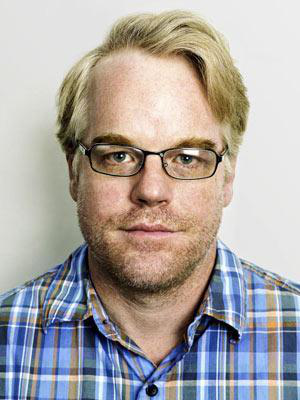

In [7]:
img = Image.open(files[33])
img

In [8]:
!git clone http://github.com/jamarju/face-detection-pytorch

Cloning into 'face-detection-pytorch'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 135 (delta 0), reused 2 (delta 0), pack-reused 129
Receiving objects: 100% (135/135), 8.79 MiB | 19.77 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [9]:
!mv face-detection-pytorch/detectors .

In [10]:
!gdown --id 1ktVh55p-Ynu6LonSyZtaUJxU23BS0Pdk

Downloading...
From: https://drive.google.com/uc?id=1ktVh55p-Ynu6LonSyZtaUJxU23BS0Pdk
To: /content/sfd_face.pth
89.8MB [00:00, 174MB/s] 


In [11]:
!mkdir detectors/s3fd/weights
!mv sfd_face.pth detectors/s3fd/weights/

In [12]:
from detectors import S3FD

In [13]:
!mv face-detection-pytorch/utils .

In [14]:
from utils.bbox import draw_bboxes

In [15]:
det = S3FD(device='cuda')

[S3FD] loading with cuda
[S3FD] finished loading (11.0761 sec)


In [16]:
bboxes = det.detect_faces(np.array(img))
bboxes

array([[ 74.83542633,  60.26441956, 227.09863281, 283.62234497,
          0.99974424]])

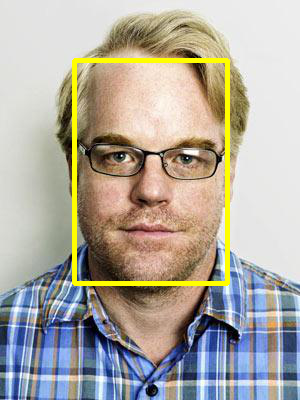

In [17]:
Image.fromarray(draw_bboxes(np.array(img), bboxes))

- guía de numpy
- 100 ejercicios de numpy

In [18]:
!mkdir /content/drive/MyDrive/demo_orla/train

mkdir: cannot create directory ‘/content/drive/MyDrive/demo_orla/train’: File exists


In [19]:
for file in tqdm(files):
  img = Image.open(file)
  while img.size[0] > 2048 or img.size[1] > 2048:
    img = img.resize((img.size[0] // 2, img.size[1] // 2))
  bboxes = det.detect_faces(np.array(img), conf_th=0.9)
  for bbox in bboxes:
    x0, y0, x1, y1 = bbox[:4].astype(int).clip(min=0)
    img = img.crop((x0, y0, x1, y1))
    img.save('/content/drive/MyDrive/demo_orla/train/' + file.stem + '.jpg', "JPEG")
